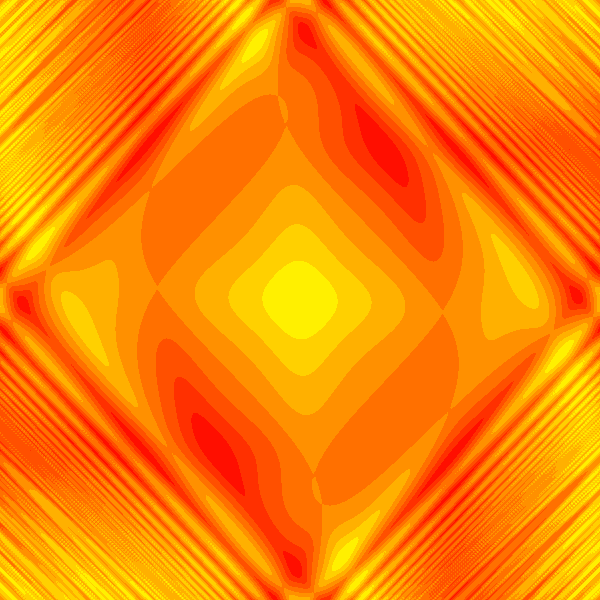

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def math_art(x, y, phase):
    return (
        np.tan(np.cos(np.sinh(x-y)/50+y+phase)) +
        np.tan(np.cos(np.sinh(x+y)/50+x+phase)) 
    )
    
x = np.linspace(-2*np.pi, 2*np.pi,300)
y = np.linspace(-2*np.pi, 2*np.pi, 300)
X, Y = np.meshgrid(x, y)

frames = []
phases = np.linspace(0, 2*np.pi, 25)

for phase in phases:
    Z = math_art(X, Y, phase)
    
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.contourf(X, Y, Z, cmap='autumn')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    # Save the current frame with tight layout
    buf = BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, transparent=True)
    buf.seek(0)
    
    image = Image.open(buf)
    
    # Convert to RGB and crop the image to remove any borders
    image = image.convert('RGB')
    bbox = image.getbbox()
    image = image.crop(bbox)
    
    frames.append(image)
    plt.close(fig)

# Save the frames as a GIF
gif_filename = 'rotating_math_art.gif'
frames[0].save(gif_filename, save_all=True, append_images=frames[1:], duration=100, loop=0)

# Display the GIF
from IPython.display import Image as IPImage
IPImage(filename=gif_filename)
